In [1]:
%load_ext lab_black

In [2]:
import warnings

warnings.filterwarnings("ignore", "This figure was using constrained_layout")

In [3]:
%matplotlib widget

In [4]:
from diviner import file_utils as fu
import pandas as pd
from diviner import calib
from diviner import div_l1a_fix

In [5]:
root = "/Users/maye/data/diviner/l1a_data/"

read in the previously defined scaling factors

In [6]:
factors = div_l1a_fix.factors

read in the data, but only from column 59, which is where the science data starts. The result has 189 columns, for all Diviner detectors.

In [7]:
# columns = arange(59, 248, dtype=int)
# olddata = loadtxt(root+'2012011400_L1A.TAB', delimiter=',',skiprows=8,
#                usecols=columns)
tstr = "2010120102"
tstr = "2012011400"
tstr = "2012071305"
data = fu.get_clean_l1a(tstr)

In [8]:
data.shape

(28128, 257)

In [ ]:
c = calib.Calibrator(data, fix_noise=True)

In [9]:
from diviner.plot_utils import plot_all_calib_blocks, plot_calib_block

In [10]:
calib_ids = data.calib_block_labels.unique().tolist()

In [11]:
plot_calib_block(data, "calib", 6, det="b3_11")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
ch1and2 = data.filter(regex="a[1,2]_").copy()

In [13]:
ch1 = data.filter(regex="a1_").copy()
ch2 = data.filter(regex="a2_").copy()

In [14]:
ch1and2.shape

(28128, 42)

In [15]:
averaged = np.average(ch1and2, axis=1)
ch1and2["averaged"] = averaged

In [16]:
t1 = "20120713 5:49"
t2 = "20120713 5:52"
ch1and2[t1:t2].filter(regex="a2_").plot()
plt.title("CH 2")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'CH 2')

In [30]:
ch1and2["a1_11 a2_11 averaged".split()].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [17]:
from scipy import signal

In [18]:
ch2["corr"] = signal.correlate(ch2.a2_01, ch2.a2_02, mode="same")

In [18]:
corr = ch2.corr()

In [24]:
corr

,a2_01,a2_02,a2_03,a2_04,a2_05,a2_06,a2_07,a2_08,a2_09,a2_10,...,a2_12,a2_13,a2_14,a2_15,a2_16,a2_17,a2_18,a2_19,a2_20,a2_21
a2_01,1.000000,0.992515,0.978729,0.966920,0.960424,0.951993,0.944336,0.935228,0.923958,0.917885,...,0.900896,0.892064,0.883511,0.878036,0.874686,0.874172,0.868693,0.863350,0.860365,0.859232
a2_02,0.992515,1.000000,0.989811,0.977587,0.969145,0.959377,0.950508,0.941528,0.930664,0.924360,...,0.906094,0.896422,0.888033,0.882088,0.878015,0.877190,0.871293,0.865978,0.862806,0.861728
a2_03,0.978729,0.989811,1.000000,0.991686,0.980417,0.968618,0.958566,0.949613,0.938979,0.931369,...,0.911802,0.901261,0.892094,0.885924,0.881685,0.880661,0.874823,0.870094,0.866561,0.865006
a2_04,0.966920,0.977587,0.991686,1.000000,0.991154,0.978913,0.968314,0.958177,0.947180,0.938264,...,0.917307,0.906480,0.896343,0.889509,0.884366,0.882998,0.877231,0.872627,0.868766,0.866749
a2_05,0.960424,0.969145,0.980417,0.991154,1.000000,0.991314,0.979607,0.968172,0.956474,0.947175,...,0.926254,0.915369,0.904734,0.897608,0.891676,0.889343,0.883195,0.878097,0.874450,0.872524
a2_06,0.951993,0.959377,0.968618,0.978913,0.991314,1.000000,0.991849,0.980079,0.967698,0.957349,...,0.934871,0.923254,0.912012,0.904783,0.897717,0.893973,0.887577,0.882145,0.877961,0.875236
a2_07,0.944336,0.950508,0.958566,0.968314,0.979607,0.991849,1.000000,0.991516,0.978465,0.967671,...,0.943113,0.931277,0.919968,0.912018,0.904561,0.900140,0.893685,0.888232,0.883965,0.881381
a2_08,0.935228,0.941528,0.949613,0.958177,0.968172,0.980079,0.991516,1.000000,0.991055,0.980003,...,0.953828,0.941711,0.929743,0.921261,0.914300,0.909800,0.902552,0.896816,0.892328,0.889713
a2_09,0.923958,0.930664,0.938979,0.947180,0.956474,0.967698,0.978465,0.991055,1.000000,0.991623,...,0.964291,0.951672,0.939592,0.931086,0.924744,0.920069,0.912799,0.907086,0.902360,0.899299
a2_10,0.917885,0.924360,0.931369,0.938264,0.947175,0.957349,0.967671,0.980003,0.991623,1.000000,...,0.976572,0.963903,0.952171,0.943704,0.936834,0.931821,0.924455,0.917534,0.912605,0.909444


In [25]:
plt.figure()
plt.imshow(corr.values)
plt.colorbar()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
import seaborn as sns

In [20]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
ch1and2[t1:t2]["a1_11 a2_11 averaged".split()].plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
ch1and2["rolling_mean"] = ch1and2.averaged.rolling(window=75, center=True).mean()

In [22]:
ch1and2["noise"] = ch1and2["averaged"] - ch1and2["rolling_mean"]

In [24]:
fig, ax = plt.subplots(nrows=2, sharex=True)
ch1and2[t1:t2][["averaged", "rolling_mean"]].plot(ax=ax[0])
ch1and2[t1:t2][["noise"]].plot(alpha=1.0, ax=ax[1])
fig.suptitle("NOISE = AVERAGE - ROLLING_MEAN (BOXCAR)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0.98, 'NOISE = AVERAGE - ROLLING_MEAN (BOXCAR)')

In [30]:
ch1and2[t1:t2].noise.abs().median()

0.5076190476138436

In [33]:
length = ch1and2.shape[0]

In [36]:
length

28128

In [37]:
ch1.shape

(28128, 21)

In [39]:
ch2.shape

(28128, 22)

In [38]:
c1.shape

(28128, 21, 81)

In [34]:
c1 = np.zeros((length, 21, 81))
c2 = np.zeros((length, 21, 81))

In [40]:
for i in range(0, 81):
    c1[40 : length - 40, :, i] = ch1.iloc[i : length - 80 + i]
    c2[40 : length - 40, :, i] = ch2.iloc[i : length - 80 + i, :-1]

In [41]:
from numpy import ma, transpose, dstack

In [42]:
max_diff1 = ma.max(ma.max(c1, axis=2) - ma.min(c1, axis=2), axis=1)
max_diff2 = ma.max(ma.max(c2, axis=2) - ma.min(c2, axis=2), axis=1)
max_diff = ma.max(transpose(dstack((max_diff1, max_diff2)), (1, 0, 2)), axis=2)

In [43]:
mydiff1 = ma.max(c1.max(axis=2) - c1.min(axis=2), axis=1)
mydiff2 = ma.max(c2.max(axis=2) - c2.min(axis=2), axis=1)
mydiff = ma.max(transpose(dstack((mydiff1, mydiff2)), (1, 0, 2)), axis=2)

In [44]:
ch1and2.noise.shape

(28128,)

In [45]:
max_diff.shape

(28128, 1)

In [46]:
noise = ch1and2.noise.where(max_diff.flatten() <= 50, 0)

In [47]:
noise[:40] = 0

In [48]:
noise[length - 40 : length] = 0

In [49]:
pd.DataFrame(factors, columns=range(1, 10)).plot()
plt.title("Correction factors")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Correction factors')

In [50]:
i = 3

In [51]:
row = factors[:, 5]

In [52]:
row.shape

(21,)

In [53]:
row

array([1.16166665, 1.11666665, 1.11166666, 1.15499997, 1.22666661,
       1.18333332, 1.20499996, 1.1833333 , 1.22999998, 1.23166662,
       1.08999997, 1.08499997, 1.17666666, 1.15666668, 1.17333333,
       1.14666667, 1.10666664, 1.13499999, 1.08666664, 1.08333329,
       1.06333329])

In [54]:
noise.shape

(28128,)

In [55]:
ch1and2["masked_noise"] = noise

In [56]:
fig, ax = plt.subplots(nrows=2)
ch1and2[["noise"]].plot(ax=ax[0], alpha=1)
ch1and2[["masked_noise"]].plot(ax=ax[1], alpha=1, color="green")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [57]:
ch1and2["corrected_masked_noise"] = ch1and2.masked_noise

In [58]:
is_not_science = data.sdtype != 0

In [59]:
ch1and2.loc[is_not_science, "corrected_masked_noise"] = 0

In [60]:
fig, ax = plt.subplots()
ch1and2[["masked_noise"]].plot(ax=ax, alpha=0.5)
ch1and2[["corrected_masked_noise"]].plot(ax=ax, alpha=0.5)
plt.title("Corrected masked noise")
# ch1and2[["noise"]].plot(secondary_y=True, ax=ax, alpha=0.5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Corrected masked noise')

In [44]:
term = noise.values[:, np.newaxis] * row

In [45]:
term.shape

(28128, 21)

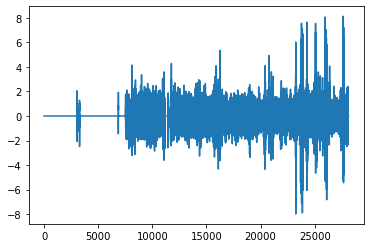

In [46]:
plt.figure()
plt.plot(term[:, 3])

In [47]:
ch = data.filter(regex="a6_").copy()

In [48]:
ch_corr = ch - term

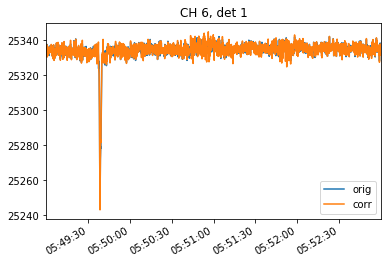

In [49]:
_, ax = plt.subplots()
ch[t1:t2].a6_01.plot(ax=ax, label="orig")
ch_corr[t1:t2].a6_01.plot(ax=ax, label="corr")
plt.title("CH 6, det 1")
plt.legend()

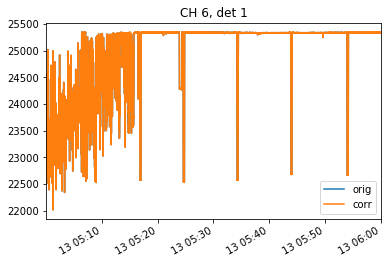

In [50]:
_, ax = plt.subplots()
ch.a6_01.plot(ax=ax, label="orig")
ch_corr.a6_01.plot(ax=ax, label="corr")
plt.title("CH 6, det 1")
plt.legend()

Text(0.5, 1.0, '(orig - corr) / orig')

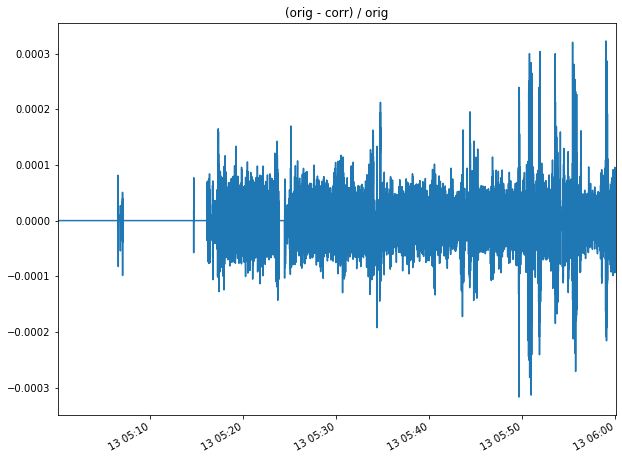

In [54]:
_, ax = plt.subplots(figsize=(10,8))
((ch.a6_01 - ch_corr.a6_01)/ ch.a6_01).plot(ax=ax)
plt.title("(orig - corr) / orig")

In [93]:
term.shape

(28128, 21)

In [219]:
data.ix[:, 'a3_01':'a3_21'] -= term

In [70]:
factors.shape

(21, 9)

In [ ]:
for i in range(2, 9):
        if i < 6:
            # a3..a6
            ch = "a" + str(i + 1)
        else:
            # b1..b3
            ch = "b" + str(i - 6 + 1)
        row = factors[:, i]
        term = noise.values[:, np.newaxis] * row
        data.ix[:, ch + "_01" : ch + "_21"] -= term